In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import gmaps
import os
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Google developer API key 
# insert gkey's value with your own Google API key in config.py file
from config import gkey

#files to load
data_1 = "Resources/California_School_District_Areas_2019-20.csv"
data_2 = "Resources/California_School_District_Areas_2020-21.csv"

# Read Files and store into Pandas data frame
school_2020_df = pd.read_csv(data_1)
school_2021_df = pd.read_csv(data_2)

In [2]:
#check data frame data_1
school_2020_df.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,SHAPE_Length,SHAPE_Area
0,1,2019-20,601770,161119,1611190000000,Alameda,Alameda Unified,Unified,PK,12,...,0,0.0,1303,11.5,3421,30.299999,3317,29.400000,56522.982848,-4.755489e+07
1,2,2019-20,601860,161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,...,0,0.0,317,8.8,658,18.299999,635,17.700001,12696.382778,-7.096327e+06
2,3,2019-20,604740,161143,1611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,0,0.0,1097,11.1,2789,28.299999,2673,27.200001,43695.341232,-4.364648e+07
3,4,2019-20,607800,161150,1611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,0,0.0,821,8.8,2121,22.799999,2036,21.799999,142492.767571,-2.838285e+08
4,5,2019-20,612630,161168,1611680000000,Alameda,Emery Unified,Unified,PK,12,...,0,0.0,73,10.1,521,72.300003,507,70.300003,13741.273106,-5.363392e+06


In [3]:
#check data frame data_2
school_2021_df.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,...,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,FRPMcount,FRPMpct,DistrctAreaSqMi,Shape__Area,Shape__Length
0,1,2020-21,601770,161119,1611190000000,Alameda,Alameda Unified,Unified,PK,12,...,0.0,1275,11.7,3202,29.3,3101,28.4,11.455570,4.755489e+07,56522.982683
1,2,2020-21,601860,161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,...,0.0,311,8.9,608,17.4,587,16.8,1.703654,7.096327e+06,12696.382797
2,3,2020-21,604740,161143,1611430000000,Alameda,Berkeley Unified,Unified,PK,12,...,0.0,1091,11.6,2563,27.2,2431,25.8,10.483362,4.364648e+07,43695.341538
3,4,2020-21,607800,161150,1611500000000,Alameda,Castro Valley Unified,Unified,PK,12,...,0.0,850,9.2,2067,22.5,1977,21.5,68.442604,2.838285e+08,142492.767565
4,5,2020-21,612630,161168,1611680000000,Alameda,Emery Unified,Unified,PK,12,...,0.0,69,9.9,561,80.4,555,79.5,1.289416,5.363392e+06,13741.272894


In [4]:
#eliminating columns data_1
#check the columns
# school_2019_df.columns

reduced_school_2020_df = school_2020_df[["Year", "CountyName",
       "EnrollTotal", "EnrollCharter", "EnrollNonCharter", "AAcount",
       "AIcount","AScount", "FIcount", "HIcount",
       "PIcount", "WHcount", "ELcount", "FOScount",
       "HOMcount", "MIGcount", "SWDcount",
       "SEDcount"]]


reduced_school_2020_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AIcount,AScount,FIcount,HIcount,PIcount,WHcount,ELcount,FOScount,HOMcount,MIGcount,SWDcount,SEDcount
0,2019-20,Alameda,11285,1913,9372,795,34,2911,630,1992,63,3210,1455,17,79,0,1303,3421
1,2019-20,Alameda,3586,0,3586,106,5,1042,38,580,4,1067,507,1,5,0,317,658
2,2019-20,Alameda,9844,0,9844,1282,14,712,84,2188,12,4054,813,21,221,0,1097,2789
3,2019-20,Alameda,9321,0,9321,472,18,2646,416,2215,38,2389,1067,13,93,0,821,2121
4,2019-20,Alameda,721,0,721,317,2,76,7,181,8,66,155,0,12,0,73,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2019-20,Yuba,524,474,50,9,10,6,0,107,4,340,11,5,1,0,81,249
939,2019-20,Yuba,10157,571,9586,383,236,876,54,4445,43,3619,2102,114,185,23,1249,8103
940,2019-20,Yuba,1359,0,1359,44,3,77,15,393,6,669,74,8,0,0,134,505
941,2019-20,Yuba,1393,93,1300,53,7,20,19,372,11,749,80,7,26,2,146,652


In [5]:
##eliminating columns data_2
reduced_school_2021_df = school_2021_df[["Year", "CountyName",
       "EnrollTotal", "EnrollCharter", "EnrollNonCharter", "AAcount",
       "AIcount","AScount", "FIcount", "HIcount",
       "PIcount", "WHcount", "ELcount", "FOScount",
       "HOMcount", "MIGcount", "SWDcount",
       "SEDcount"]]
reduced_school_2021_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AIcount,AScount,FIcount,HIcount,PIcount,WHcount,ELcount,FOScount,HOMcount,MIGcount,SWDcount,SEDcount
0,2020-21,Alameda,10927,1856,9071,715,29,2768,605,1989,61,3021,1316,16,77,0,1275,3202
1,2020-21,Alameda,3501,0,3501,118,7,1010,39,577,3,1007,400,2,3,0,311,608
2,2020-21,Alameda,9409,0,9409,1193,26,781,79,2084,13,3889,635,16,199,0,1091,2563
3,2020-21,Alameda,9203,0,9203,451,10,2711,425,2150,36,2237,996,17,92,0,850,2067
4,2020-21,Alameda,698,0,698,315,2,77,6,169,8,60,140,0,1,0,69,561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2020-21,Yuba,572,522,50,15,10,9,0,105,0,367,8,3,7,0,88,252
938,2020-21,Yuba,9930,570,9360,368,183,870,54,4484,33,3379,2051,77,76,27,1307,7278
939,2020-21,Yuba,1348,0,1348,47,5,75,19,399,6,650,63,6,1,1,142,485
940,2020-21,Yuba,1278,92,1186,40,6,18,17,352,11,660,71,3,42,2,142,535


In [6]:
#rename columns to make it easier to read-2019 data
county_2020_df = reduced_school_2020_df.rename(columns={"AAcount":"African American",
       "AIcount": "American Indian","AScount":"Asian", "FIcount":"Filipino", "HIcount": "Hispanic",
       "PIcount": "Pacific Islander", "WHcount": "White", "ELcount": "English Learner", "FOScount": "Foster Care",
       "HOMcount": "Homeless", "MIGcount": "Migrant", "SWDcount": "Students with Disabilities",
       "SEDcount": "Socioeconomically Disadvantaged"})
county_2020_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
0,2019-20,Alameda,11285,1913,9372,795,34,2911,630,1992,63,3210,1455,17,79,0,1303,3421
1,2019-20,Alameda,3586,0,3586,106,5,1042,38,580,4,1067,507,1,5,0,317,658
2,2019-20,Alameda,9844,0,9844,1282,14,712,84,2188,12,4054,813,21,221,0,1097,2789
3,2019-20,Alameda,9321,0,9321,472,18,2646,416,2215,38,2389,1067,13,93,0,821,2121
4,2019-20,Alameda,721,0,721,317,2,76,7,181,8,66,155,0,12,0,73,521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2019-20,Yuba,524,474,50,9,10,6,0,107,4,340,11,5,1,0,81,249
939,2019-20,Yuba,10157,571,9586,383,236,876,54,4445,43,3619,2102,114,185,23,1249,8103
940,2019-20,Yuba,1359,0,1359,44,3,77,15,393,6,669,74,8,0,0,134,505
941,2019-20,Yuba,1393,93,1300,53,7,20,19,372,11,749,80,7,26,2,146,652


In [7]:
#rename columns to make it easier to read-2021 data
county_2021_df = reduced_school_2021_df.rename(columns={"AAcount":"African American",
       "AIcount": "American Indian","AScount":"Asian", "FIcount":"Filipino", "HIcount": "Hispanic",
       "PIcount": "Pacific Islander", "WHcount": "White", "ELcount": "English Learner", "FOScount": "Foster Care",
       "HOMcount": "Homeless", "MIGcount": "Migrant", "SWDcount": "Students with Disabilities",
       "SEDcount": "Socioeconomically Disadvantaged"})
county_2021_df

,Year,CountyName,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
0,2020-21,Alameda,10927,1856,9071,715,29,2768,605,1989,61,3021,1316,16,77,0,1275,3202
1,2020-21,Alameda,3501,0,3501,118,7,1010,39,577,3,1007,400,2,3,0,311,608
2,2020-21,Alameda,9409,0,9409,1193,26,781,79,2084,13,3889,635,16,199,0,1091,2563
3,2020-21,Alameda,9203,0,9203,451,10,2711,425,2150,36,2237,996,17,92,0,850,2067
4,2020-21,Alameda,698,0,698,315,2,77,6,169,8,60,140,0,1,0,69,561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2020-21,Yuba,572,522,50,15,10,9,0,105,0,367,8,3,7,0,88,252
938,2020-21,Yuba,9930,570,9360,368,183,870,54,4484,33,3379,2051,77,76,27,1307,7278
939,2020-21,Yuba,1348,0,1348,47,5,75,19,399,6,650,63,6,1,1,142,485
940,2020-21,Yuba,1278,92,1186,40,6,18,17,352,11,660,71,3,42,2,142,535


In [8]:
def createHeatMapDfByCountyNameAndEnrollmentTotal(county_df):
    countyEnrollmentDict = {}

    for idx in county_df.index:
        countyName = county_df["CountyName"][idx]
        enrollmentTotal = county_df["EnrollTotal"][idx]

        if countyName not in countyEnrollmentDict:
            countyEnrollmentDict[countyName] = enrollmentTotal
        else:
            countyEnrollmentDict[countyName] += enrollmentTotal

    heatMapData = []

    for target_city in countyEnrollmentDict.keys():
        enrollmentTotal = countyEnrollmentDict[target_city]
        # append state information
        target_city = target_city + ", CA"
        # Build the endpoint URL
        target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={target_city}&key={gkey}"
        geo_data = requests.get(target_url).json()
        full_country_name = geo_data["results"][0]["formatted_address"]
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        heatMapData.append([full_country_name, lat, lng, enrollmentTotal])

    heatMap_df = pd.DataFrame(heatMapData, columns = ['County Name', 'Lat', 'Lng', 'Enrollment Total'])

    return heatMap_df

In [9]:
# HeatMap of countyName and Enrollment Total of Year 2019 - 2020:
gmaps.configure(api_key=gkey)

heatMap_df_2020 = createHeatMapDfByCountyNameAndEnrollmentTotal(county_2020_df)

In [10]:
locations_2020 = heatMap_df_2020[['Lat', 'Lng']]
enrollment_2020 = heatMap_df_2020['Enrollment Total']

# Plot HeatMap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_2020, weights=enrollment_2020,
                                     dissipating=False, max_intensity=1000,
                                     point_radius=0.05)
# Add Layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
# HeatMap of countyName and Enrollment Total of Year 2021:
heatMap_df_2021 = createHeatMapDfByCountyNameAndEnrollmentTotal(county_2021_df)

In [12]:
locations_2021 = heatMap_df_2021[['Lat', 'Lng']]
enrollment_2021 = heatMap_df_2021['Enrollment Total']

# Plot HeatMap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_2021, weights=enrollment_2021,
                                     dissipating=False, max_intensity=1000,
                                     point_radius=0.05)
# Add Layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#reduce rows to 1 per county-2019
school_2020 = county_2020_df.groupby("CountyName").sum()
school_2020

,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
CountyName,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,43172,402,3062,989,24319,95233
Alpine,70,0,70,0,36,0,0,2,0,26,0,2,14,0,12,43
Amador,3958,0,3958,18,89,20,20,868,8,2633,121,19,75,0,523,1607
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,1900,247,1234,123,3558,17222
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,189,70,144,0,805,2511
Colusa,4698,0,4698,33,55,52,3,3729,9,768,1788,32,224,253,547,3673
Contra Costa,172089,5929,166160,14712,514,23019,7193,62267,1064,49753,27395,540,1974,12,20454,69751
Del Norte,3981,275,3706,25,561,186,22,887,3,2037,263,50,158,0,567,2672
El Dorado,29489,5423,24066,312,225,1108,413,6013,78,19618,1949,131,560,0,3498,9447


In [14]:
#reduce rows to 1 per county-2021
school_2021 = county_2021_df.groupby("CountyName").sum()
school_2021

,EnrollTotal,EnrollCharter,EnrollNonCharter,African American,American Indian,Asian,Filipino,Hispanic,Pacific Islander,White,English Learner,Foster Care,Homeless,Migrant,Students with Disabilities,Socioeconomically Disadvantaged
CountyName,,,,,,,,,,,,,,,,
Alameda,218094,19142,198952,18958,543,60791,9893,73527,2076,36056,40130,442,2825,855,24977,90679
Alpine,73,0,73,0,30,1,1,3,0,34,0,0,9,0,11,45
Amador,3889,0,3889,17,80,16,18,897,6,2553,101,23,118,0,750,1674
Butte,27794,2945,24849,559,592,1726,119,7198,86,15256,1822,245,829,67,3651,16940
Calaveras,4543,0,4543,30,74,30,15,1027,5,3059,182,40,100,0,760,2251
Colusa,4635,0,4635,35,58,51,4,3708,8,724,1778,28,363,237,553,3376
Contra Costa,166137,5791,160346,13914,501,22948,7043,60601,988,46402,24723,493,1821,10,20298,65844
Del Norte,3818,254,3564,25,548,173,20,879,3,1904,233,64,134,0,552,2523
El Dorado,28414,5305,23109,272,221,1155,412,5882,71,18700,1827,102,475,0,3528,8792


In [15]:
#added year column back 
school_2020['Year'] = "2019-2020"
school_2021['Year'] = "2020-2021"

In [16]:
combined_data_df = pd.merge(school_2020, school_2021, how="outer", on=["CountyName"])
combined_data_df

,EnrollTotal_x,EnrollCharter_x,EnrollNonCharter_x,African American_x,American Indian_x,Asian_x,Filipino_x,Hispanic_x,Pacific Islander_x,White_x,...,Hispanic_y,Pacific Islander_y,White_y,English Learner_y,Foster Care_y,Homeless_y,Migrant_y,Students with Disabilities_y,Socioeconomically Disadvantaged_y,Year_y
CountyName,,,,,,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,...,73527,2076,36056,40130,442,2825,855,24977,90679,2020-2021
Alpine,70,0,70,0,36,0,0,2,0,26,...,3,0,34,0,0,9,0,11,45,2020-2021
Amador,3958,0,3958,18,89,20,20,868,8,2633,...,897,6,2553,101,23,118,0,750,1674,2020-2021
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,...,7198,86,15256,1822,245,829,67,3651,16940,2020-2021
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,...,1027,5,3059,182,40,100,0,760,2251,2020-2021
Colusa,4698,0,4698,33,55,52,3,3729,9,768,...,3708,8,724,1778,28,363,237,553,3376,2020-2021
Contra Costa,172089,5929,166160,14712,514,23019,7193,62267,1064,49753,...,60601,988,46402,24723,493,1821,10,20298,65844,2020-2021
Del Norte,3981,275,3706,25,561,186,22,887,3,2037,...,879,3,1904,233,64,134,0,552,2523,2020-2021
El Dorado,29489,5423,24066,312,225,1108,413,6013,78,19618,...,5882,71,18700,1827,102,475,0,3528,8792,2020-2021


In [17]:
combined_data_df.columns

Index(['EnrollTotal_x', 'EnrollCharter_x', 'EnrollNonCharter_x',
       'African American_x', 'American Indian_x', 'Asian_x', 'Filipino_x',
       'Hispanic_x', 'Pacific Islander_x', 'White_x', 'English Learner_x',
       'Foster Care_x', 'Homeless_x', 'Migrant_x',
       'Students with Disabilities_x', 'Socioeconomically Disadvantaged_x',
       'Year_x', 'EnrollTotal_y', 'EnrollCharter_y', 'EnrollNonCharter_y',
       'African American_y', 'American Indian_y', 'Asian_y', 'Filipino_y',
       'Hispanic_y', 'Pacific Islander_y', 'White_y', 'English Learner_y',
       'Foster Care_y', 'Homeless_y', 'Migrant_y',
       'Students with Disabilities_y', 'Socioeconomically Disadvantaged_y',
       'Year_y'],
      dtype='object')

In [18]:
#rename variables

combined_data_df = combined_data_df.rename(columns={"EnrollTotal_x": "EnrollTotal_2020", "EnrollCharter_x": "EnrollCharter_2020", "EnrollNonCharter_x": "EnrollNonCharter_2020",
       "African American_x": "African American_2020", "American Indian_x": "American Indian_2020" , "Asian_x": "Asian_2020", "Filipino_x": "Filipino_2020",
       "Hispanic_x": "Hispanic_2020", "Pacific Islander_x": "Pacific Islander_2020", "White_x": "White_2020", "English Learner_x": "English Learner_2020",
       "Foster Care_x": "Foster Care_2020", "Homeless_x": "Homeless_2020", "Migrant_x": "Migrant_2020",
       "Students with Disabilities_x": "Students with Disabilities_2020", "Socioeconomically Disadvantaged_x": "Socioeconomically Disadvantaged_2020", "Year_x": "Year:2020"})

combined_data_df = combined_data_df.rename(columns={"EnrollTotal_y": "EnrollTotal_2021", "EnrollCharter_y": "EnrollCharter_2021", "EnrollNonCharter_y": "EnrollNonCharter_2021",
       "African American_y": "African American_2021", "American Indian_y": "American Indian_2021" , "Asian_y": "Asian_2021", "Filipino_y": "Filipino_2021",
       "Hispanic_y": "Hispanic_2021", "Pacific Islander_y": "Pacific Islander_2021", "White_y": "White_2021", "English Learner_y": "English Learner_2021",
       "Foster Care_y": "Foster Care_2021", "Homeless_y": "Homeless_2021", "Migrant_y": "Migrant_2021",
       "Students with Disabilities_y": "Students with Disabilities_2021", "Socioeconomically Disadvantaged_y": "Socioeconomically Disadvantaged_2021", "Year_y": "Year:2021"})
combined_data_df.head()                     

,EnrollTotal_2020,EnrollCharter_2020,EnrollNonCharter_2020,African American_2020,American Indian_2020,Asian_2020,Filipino_2020,Hispanic_2020,Pacific Islander_2020,White_2020,...,Hispanic_2021,Pacific Islander_2021,White_2021,English Learner_2021,Foster Care_2021,Homeless_2021,Migrant_2021,Students with Disabilities_2021,Socioeconomically Disadvantaged_2021,Year:2021
CountyName,,,,,,,,,,,,,,,,,,,,,
Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,38721,...,73527,2076,36056,40130,442,2825,855,24977,90679,2020-2021
Alpine,70,0,70,0,36,0,0,2,0,26,...,3,0,34,0,0,9,0,11,45,2020-2021
Amador,3958,0,3958,18,89,20,20,868,8,2633,...,897,6,2553,101,23,118,0,750,1674,2020-2021
Butte,28777,2926,25851,587,661,1757,124,7230,98,16126,...,7198,86,15256,1822,245,829,67,3651,16940,2020-2021
Calaveras,4885,0,4885,33,78,30,17,1052,4,3364,...,1027,5,3059,182,40,100,0,760,2251,2020-2021


In [19]:
combined_data_df.columns

Index(['EnrollTotal_2020', 'EnrollCharter_2020', 'EnrollNonCharter_2020',
       'African American_2020', 'American Indian_2020', 'Asian_2020',
       'Filipino_2020', 'Hispanic_2020', 'Pacific Islander_2020', 'White_2020',
       'English Learner_2020', 'Foster Care_2020', 'Homeless_2020',
       'Migrant_2020', 'Students with Disabilities_2020',
       'Socioeconomically Disadvantaged_2020', 'Year:2020', 'EnrollTotal_2021',
       'EnrollCharter_2021', 'EnrollNonCharter_2021', 'African American_2021',
       'American Indian_2021', 'Asian_2021', 'Filipino_2021', 'Hispanic_2021',
       'Pacific Islander_2021', 'White_2021', 'English Learner_2021',
       'Foster Care_2021', 'Homeless_2021', 'Migrant_2021',
       'Students with Disabilities_2021',
       'Socioeconomically Disadvantaged_2021', 'Year:2021'],
      dtype='object')

In [20]:
#confirming again there are no nulls
combined_data_df.count()

EnrollTotal_2020                        58
EnrollCharter_2020                      58
EnrollNonCharter_2020                   58
African American_2020                   58
American Indian_2020                    58
Asian_2020                              58
Filipino_2020                           58
Hispanic_2020                           58
Pacific Islander_2020                   58
White_2020                              58
English Learner_2020                    58
Foster Care_2020                        58
Homeless_2020                           58
Migrant_2020                            58
Students with Disabilities_2020         58
Socioeconomically Disadvantaged_2020    58
Year:2020                               58
EnrollTotal_2021                        58
EnrollCharter_2021                      58
EnrollNonCharter_2021                   58
African American_2021                   58
American Indian_2021                    58
Asian_2021                              58
Filipino_20

## Student Enrollment situation  pre-Covid vs. post-Covid

### Factor:  Students with Disabilities

In [21]:
# extract column
disable_df=pd.DataFrame(combined_data_df[["EnrollTotal_2020","Students with Disabilities_2020"\
                             ,"EnrollTotal_2021","Students with Disabilities_2021"]])

# add percentage column for 2020 and 2021
disable_df["percent_2020"] = round(disable_df["Students with Disabilities_2020"]/disable_df["EnrollTotal_2020"]*100,2)
disable_df["percent_2021"] = round(disable_df["Students with Disabilities_2021"]/disable_df["EnrollTotal_2021"]*100,2)

# calculate the average percentage difference
avgDiff = (disable_df["percent_2021"] - disable_df["percent_2020"]).sum()/len(disable_df)

# formatting the column
disable_df["percent_2021"] =disable_df["percent_2021"].map("%{:.2f}".format)
disable_df["percent_2020"] =disable_df["percent_2020"].map("%{:.2f}".format)

disable_df.head()

,EnrollTotal_2020,Students with Disabilities_2020,EnrollTotal_2021,Students with Disabilities_2021,percent_2020,percent_2021
CountyName,,,,,,
Alameda,222812,24319,218094,24977,%10.91,%11.45
Alpine,70,12,73,11,%17.14,%15.07
Amador,3958,523,3889,750,%13.21,%19.29
Butte,28777,3558,27794,3651,%12.36,%13.14
Calaveras,4885,805,4543,760,%16.48,%16.73


In [22]:
sum_2020 = disable_df["EnrollTotal_2020"].sum()
disableSum_2020 = disable_df["Students with Disabilities_2020"].sum()
percent_2020 = disableSum_2020/sum_2020*100 

sum_2021 = disable_df["EnrollTotal_2021"].sum()
disableSum_2021 = disable_df["Students with Disabilities_2021"].sum()
percent_2021 = disableSum_2021/sum_2021*100 

In [23]:
# create summary data frame
disableSummary_df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                                  "Total Enrollment of Students with Disabilities in 2020":[disableSum_2020],
                                  "Percent of Students with Disabilities in 2020" : [percent_2020],
                                  "Total Enrollment in 2021" : [sum_2021],
                                  "Total Enrollment of Students with Disabilities in 2021":[disableSum_2021],
                                  "Percent of Students with Disabilities in 2021" : [percent_2021],
                                  "Average percentage differnce" : [avgDiff]
                                })

# fomatting columns
disableSummary_df["Percent of Students with Disabilities in 2020"]\
=disableSummary_df["Percent of Students with Disabilities in 2020"].map("%{:.2f}".format)

disableSummary_df["Percent of Students with Disabilities in 2021"]\
=disableSummary_df["Percent of Students with Disabilities in 2021"].map("%{:.2f}".format)

disableSummary_df["Average percentage differnce"]\
=disableSummary_df["Average percentage differnce"].map("%{:.2f}".format)

disableSummary_df

,Total Enrollment in 2020,Total Enrollment of Students with Disabilities in 2020,Percent of Students with Disabilities in 2020,Total Enrollment in 2021,Total Enrollment of Students with Disabilities in 2021,Percent of Students with Disabilities in 2021,Average percentage differnce
0,6038302,695002,%11.51,5873395,721204,%12.28,%0.83


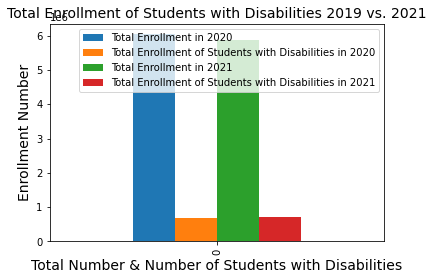

In [24]:
# create grouped barchart
df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                   "Total Enrollment of Students with Disabilities in 2020":[disableSum_2020],
                   "Total Enrollment in 2021" : [sum_2021],
                   "Total Enrollment of Students with Disabilities in 2021":[disableSum_2021]
                   })


ax = df.plot.bar()
plt.rcParams["figure.figsize"] = (12,7)
plt.title("Total Enrollment of Students with Disabilities 2019 vs. 2021", fontsize = 14)
plt.xlabel("Total Number & Number of Students with Disabilities", fontsize = 14)
plt.ylabel("Enrollment Number", fontsize = 14)
plt.savefig("Images/Disable.png")

### The average difference of _Students with Disabilities_ enrollment percentage between 2019 and 2021 is 0.83%.  The pandemic doesn't display a significant effect on overall enrollment of _Students with Disabilities_

 ### Factor:  Socioeconomically Disadvantaged

In [25]:
# extract column
social_df=pd.DataFrame(combined_data_df[["EnrollTotal_2020","Socioeconomically Disadvantaged_2020"\
                             ,"EnrollTotal_2021","Socioeconomically Disadvantaged_2021"]])

# add new columns for percentage 
social_df["percent_2020"] = round(social_df["Socioeconomically Disadvantaged_2020"]/social_df["EnrollTotal_2020"]*100,2)
social_df["percent_2021"] = round(social_df["Socioeconomically Disadvantaged_2021"]/social_df["EnrollTotal_2021"]*100,2)

# calculate average percentage difference
avgDiff_socio = (social_df["percent_2021"] - social_df["percent_2020"]).sum()/len(social_df)

# formatting columns
social_df["percent_2021"] = social_df["percent_2021"].map("%{:.2f}".format)
social_df["percent_2020"] = social_df["percent_2020"].map("%{:.2f}".format)
social_df.head()

,EnrollTotal_2020,Socioeconomically Disadvantaged_2020,EnrollTotal_2021,Socioeconomically Disadvantaged_2021,percent_2020,percent_2021
CountyName,,,,,,
Alameda,222812,95233,218094,90679,%42.74,%41.58
Alpine,70,43,73,45,%61.43,%61.64
Amador,3958,1607,3889,1674,%40.60,%43.04
Butte,28777,17222,27794,16940,%59.85,%60.95
Calaveras,4885,2511,4543,2251,%51.40,%49.55


In [26]:
socioDisadvan_2020 = social_df["Socioeconomically Disadvantaged_2020"].sum()
percentSocio_2020 = socioDisadvan_2020/sum_2020*100 

socioDisadvan_2021 = social_df["Socioeconomically Disadvantaged_2021"].sum()
percentSocio_2021 = socioDisadvan_2021/sum_2021*100 

In [27]:
# create summary data frame
socioSummary_df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                                  "Total Enrollment of Socioeconomically Disadvantaged students 2020":[socioDisadvan_2020],
                                  "Percent of Socioeconomically Disadvantaged students in 2020" : [percentSocio_2020 ],
                                  "Total Enrollment in 2021" : [sum_2021],
                                  "Total Enrollment of Socioeconomically Disadvantaged students in 2021":[socioDisadvan_2021],
                                  "Percent of Socioeconomically Disadvantaged students in 2021" : [percentSocio_2021],
                                  "Average percentage differnce" : [avgDiff_socio]
                                })

# formatting columns
socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2020"]\
=socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2020"].map("%{:.2f}".format)

socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2021"]\
=socioSummary_df["Percent of Socioeconomically Disadvantaged students in 2021"].map("%{:.2f}".format)

socioSummary_df["Average percentage differnce"]\
=socioSummary_df["Average percentage differnce"].map("%{:.2f}".format)

socioSummary_df

,Total Enrollment in 2020,Total Enrollment of Socioeconomically Disadvantaged students 2020,Percent of Socioeconomically Disadvantaged students in 2020,Total Enrollment in 2021,Total Enrollment of Socioeconomically Disadvantaged students in 2021,Percent of Socioeconomically Disadvantaged students in 2021,Average percentage differnce
0,6038302,3663287,%60.67,5873395,3542861,%60.32,%-0.41


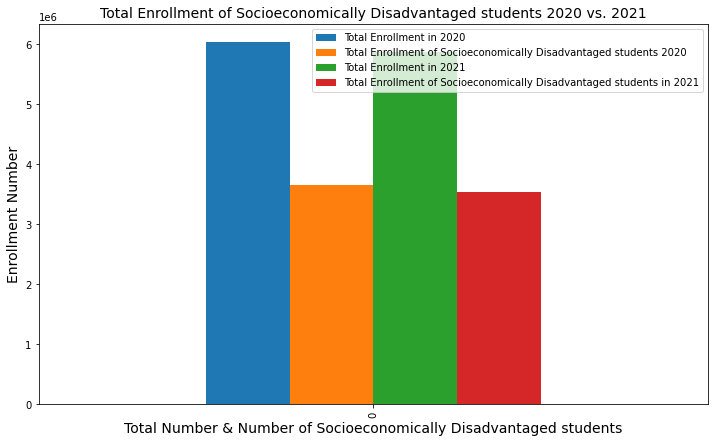

In [28]:
index = ['2020', '2021']
df = pd.DataFrame({"Total Enrollment in 2020" : [sum_2020],
                   "Total Enrollment of Socioeconomically Disadvantaged students 2020":[socioDisadvan_2020],
                   "Total Enrollment in 2021" : [sum_2021],
                   "Total Enrollment of Socioeconomically Disadvantaged students in 2021":[socioDisadvan_2021]
                   })

ax = df.plot.bar()
plt.rcParams["figure.figsize"] = (12,7)
plt.title("Total Enrollment of Socioeconomically Disadvantaged students 2020 vs. 2021", fontsize = 14)
plt.xlabel("Total Number & Number of Socioeconomically Disadvantaged students", fontsize = 14)
plt.ylabel("Enrollment Number", fontsize = 14)
ax.legend()
plt.savefig("Images/Socio.png")

### The average difference of _Socioeconomically Disadvantaged Students_ enrollment percentage between 2019 and 2021 is -0.41%.  The pandemic doesn't display a significant effect on overall enrollment of _Socioeconomically Disadvantaged Students_

##Foster Care Data

In [29]:
#reduce columns and added a percent column

foster_care_df = combined_data_df[["EnrollTotal_2020", "Foster Care_2020", "EnrollTotal_2021", "Foster Care_2021"]]
foster_care_df

foster_care_df["Percent Total 2020"] = (foster_care_df["Foster Care_2020"]/foster_care_df["EnrollTotal_2020"]*100)
foster_care_df["Percent Total 2021"] = (foster_care_df["Foster Care_2021"]/foster_care_df["EnrollTotal_2021"]*100)

foster_care_df.style.format(
    {"Percent Total 2020":"{:,.3f}%",
     "Percent Total 2021":"{:,.3f}%"
        
    })


<ipython-input-29-faca3415a88a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foster_care_df["Percent Total 2020"] = (foster_care_df["Foster Care_2020"]/foster_care_df["EnrollTotal_2020"]*100)
<ipython-input-29-faca3415a88a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foster_care_df["Percent Total 2021"] = (foster_care_df["Foster Care_2021"]/foster_care_df["EnrollTotal_2021"]*100)


,EnrollTotal_2020,Foster Care_2020,EnrollTotal_2021,Foster Care_2021,Percent Total 2020,Percent Total 2021
CountyName,,,,,,
Alameda,222812,402,218094,442,0.180%,0.203%
Alpine,70,2,73,0,2.857%,0.000%
Amador,3958,19,3889,23,0.480%,0.591%
Butte,28777,247,27794,245,0.858%,0.881%
Calaveras,4885,70,4543,40,1.433%,0.880%
Colusa,4698,32,4635,28,0.681%,0.604%
Contra Costa,172089,540,166137,493,0.314%,0.297%
Del Norte,3981,50,3818,64,1.256%,1.676%
El Dorado,29489,131,28414,102,0.444%,0.359%


In [30]:
#did a sum of all rows, created a new data frame, formated numbers

total_foster_enrollment_2020 = foster_care_df["EnrollTotal_2020"].sum()
total_foster_2020 = foster_care_df["Foster Care_2020"].sum()
total_percent_2020 = total_foster_2020/total_foster_enrollment_2020*100

total_foster_enrollment_2021 = foster_care_df["EnrollTotal_2021"].sum()
total_foster_2021 = foster_care_df["Foster Care_2021"].sum()
total_percent_2021 = total_foster_2021/total_foster_enrollment_2021*100 

foster_summary_df = pd.DataFrame({
    "Total Enrollment 2020": [total_foster_enrollment_2020],
    "Total Foster 2020": [total_foster_2020],
    "Percent of Foster 2020": [total_percent_2020],
    "Total Enrollment 2021": [total_foster_enrollment_2021],
    "Total Foster 2021": [total_foster_2021],
    "Percent of Foster 2021": [total_percent_2021]
})

foster_summary_df.style.format({
    "Total Enrollment 2020": "{:,.2f}",
    "Total Foster 2020": "{:,.2f}",
    "Percent of Foster 2020": "{:,.3f}%",
    "Total Enrollment 2021": "{:,.2f}",
    "Total Foster 2021": "{:,.2f}",
    "Percent of Foster 2021": "{:,.3f}%"
})



,Total Enrollment 2020,Total Foster 2020,Percent of Foster 2020,Total Enrollment 2021,Total Foster 2021,Percent of Foster 2021
0,"6,038,302.00","31,583.00",0.523%,"5,873,395.00","30,783.00",0.524%


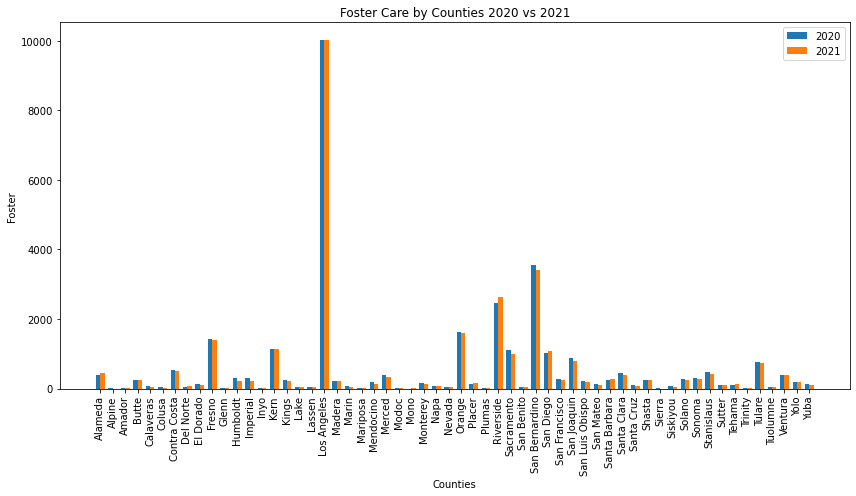

In [31]:
#created bar graph for foster enrollments

# type_enrollments = ["Total Foster 2020", "Total Foster 2021" ]
# enrollments = [31583, 30783]
# x_axis = np.arange(len(enrollments))

# plt.bar(x_axis, enrollments, align="center")

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, type_enrollments)

# plt.title("Foster Care Enrollments 2020 vs 2021")
# plt.xlabel("Years")
# plt.ylabel("Enrollment Totals")

# # foster_chart = foster_graph.plot(kind='bar')

# # # Set the xlabel and ylabel using class methods
# # foster_chart.set_xlabel("Types of Enrollment")
# # foster_chart.set_ylabel("Enrollment #'s'")


# plt.show()
# # plt.tight_layout() 


#we decided to change it to show counties

foster_care_bar_df = combined_data_df.reset_index()
FC_2020 = foster_care_bar_df['Foster Care_2020']
FC_2021 = foster_care_bar_df['Foster Care_2021']
foster_labels = foster_care_bar_df["CountyName"]

x = np.arange(len(foster_labels))  
width = 0.35 
fig, ax = plt.subplots(figsize=(12, 7))
# dpi=300
fc_bar1 = ax.bar(x - width/2, FC_2020, width, label='2020')
fc_bar2 = ax.bar(x + width/2, FC_2021, width, label='2021')


#added titles and labels
ax.set_ylabel('Foster')
ax.set_xlabel('Counties')
ax.set_title('Foster Care by Counties 2020 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(foster_labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.show()

Migrant Data##

In [32]:
migrant_df = combined_data_df[["EnrollTotal_2020", "Migrant_2020", "EnrollTotal_2021", "Migrant_2021"]]
migrant_df

migrant_df["Percent Total 2020"] = (migrant_df["Migrant_2020"]/migrant_df["EnrollTotal_2020"]*100)
migrant_df["Percent Total 2021"] = (migrant_df["Migrant_2021"]/migrant_df["EnrollTotal_2021"]*100)

migrant_df.style.format(
    {"Percent Total 2020":"{:,.3f}%",
     "Percent Total 2021":"{:,.3f}%"
        
    })

<ipython-input-32-2183433b2179>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrant_df["Percent Total 2020"] = (migrant_df["Migrant_2020"]/migrant_df["EnrollTotal_2020"]*100)
<ipython-input-32-2183433b2179>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrant_df["Percent Total 2021"] = (migrant_df["Migrant_2021"]/migrant_df["EnrollTotal_2021"]*100)


,EnrollTotal_2020,Migrant_2020,EnrollTotal_2021,Migrant_2021,Percent Total 2020,Percent Total 2021
CountyName,,,,,,
Alameda,222812,989,218094,855,0.444%,0.392%
Alpine,70,0,73,0,0.000%,0.000%
Amador,3958,0,3889,0,0.000%,0.000%
Butte,28777,123,27794,67,0.427%,0.241%
Calaveras,4885,0,4543,0,0.000%,0.000%
Colusa,4698,253,4635,237,5.385%,5.113%
Contra Costa,172089,12,166137,10,0.007%,0.006%
Del Norte,3981,0,3818,0,0.000%,0.000%
El Dorado,29489,0,28414,0,0.000%,0.000%


In [33]:
total_migrant_enrollment_2020 = migrant_df["EnrollTotal_2020"].sum()
total_migrant_2020 = migrant_df["Migrant_2020"].sum()
total_migrant_percent_2020 = total_migrant_2020/total_migrant_enrollment_2020*100 

total_migrant_enrollment_2021 = migrant_df["EnrollTotal_2021"].sum()
total_migrant_2021 = migrant_df["Migrant_2021"].sum()
total_migrant_percent_2021 = total_migrant_2021/total_migrant_enrollment_2021*100 

foster_summary_df = pd.DataFrame({
    "Total Enrollment 2020": [total_migrant_enrollment_2020],
    "Total Migrant 2020": [total_migrant_2020],
    "Percent of Migrant 2020": [total_migrant_percent_2020],
    "Total Enrollment 2021": [total_migrant_enrollment_2021],
    "Total Migrant 2021": [total_migrant_2021],
    "Percent of Migrant 2021": [total_migrant_percent_2021]
})

foster_summary_df.style.format({
    "Total Enrollment 2020": "{:,.2f}",
    "Total Migrant 2020": "{:,.2f}",
    "Percent of Migrant 2020": "{:,.3f}%",
    "Total Enrollment 2021": "{:,.2f}",
    "Total Migrant 2021": "{:,.2f}",
    "Percent of Migrant 2021": "{:,.3f}%"
})


,Total Enrollment 2020,Total Migrant 2020,Percent of Migrant 2020,Total Enrollment 2021,Total Migrant 2021,Percent of Migrant 2021
0,"6,038,302.00","47,268.00",0.783%,"5,873,395.00","46,409.00",0.790%


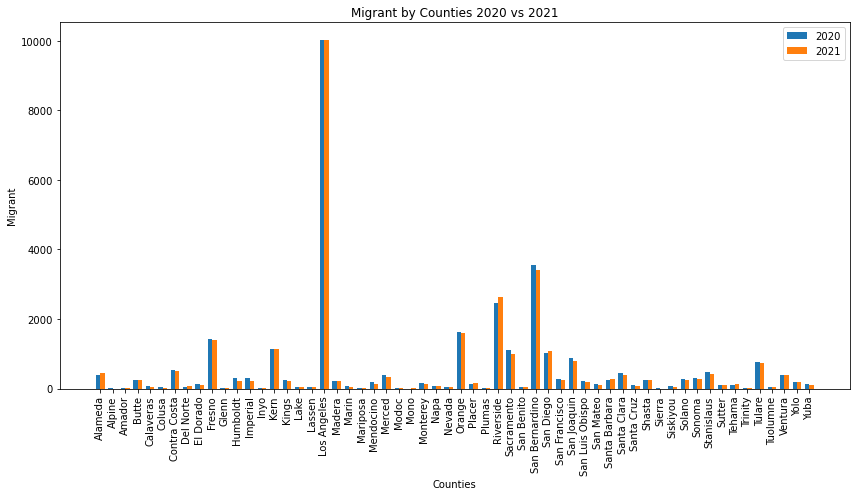

In [34]:
#created bar graph for migrant enrollments

# type_of_enrollments = ["Total Migrants 2020", "Total Migrants 2021" ]
# enrollment_numb = [47268, 46409]
# x_axis = np.arange(len(enrollments))

# plt.bar(x_axis, enrollment_numb, align="center")

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, type_of_enrollments)

# plt.title("Migrant Enrollments 2020 vs 2021")
# plt.xlabel("Years")
# plt.ylabel("Enrollment Totals")

# # foster_chart = foster_graph.plot(kind='bar')

# # # Set the xlabel and ylabel using class methods
# # foster_chart.set_xlabel("Types of Enrollment")
# # foster_chart.set_ylabel("Enrollment #'s'")


# plt.show()

#we decided to change it to show counties

migrant_bar_df = combined_data_df.reset_index()
m_2020 = foster_care_bar_df['Migrant_2020']
m_2021 = foster_care_bar_df['Migrant_2021']
migrant_labels = foster_care_bar_df["CountyName"]

x = np.arange(len(foster_labels))  
width = 0.35 
fig, ax = plt.subplots(figsize=(12, 7))
# dpi=300
fc_bar1 = ax.bar(x - width/2, FC_2020, width, label='2020')
fc_bar2 = ax.bar(x + width/2, FC_2021, width, label='2021')


#added titles and labels
ax.set_ylabel('Migrant')
ax.set_xlabel('Counties')
ax.set_title('Migrant by Counties 2020 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(foster_labels, rotation="vertical")
ax.legend()
fig.tight_layout()
plt.show()

In [35]:
# Files to load

data_3 = "Resources/covid19cases_test.csv"

# Read file and store into pandas data frame

COVID19_cases_df = pd.read_csv(data_3)

In [36]:
# Eliminating columns in data_3

reduced_COVID19_cases_df = COVID19_cases_df[["date", "area", "cumulative_positive_tests"]]
reduced_COVID19_cases_df

,date,area,cumulative_positive_tests
0,2/1/20,Alameda,0
1,2/2/20,Alameda,0
2,2/3/20,Alameda,0
3,2/4/20,Alameda,0
4,2/5/20,Alameda,0
...,...,...,...
37927,11/11/21,Yuba,11873
37928,11/12/21,Yuba,11877
37929,11/13/21,Yuba,11880
37930,11/14/21,Yuba,11880


In [37]:
# Check the columns

reduced_COVID19_cases_df.columns

Index(['date', 'area', 'cumulative_positive_tests'], dtype='object')

In [38]:
# Rename columns to make it easier to read reduced_COVID19_cases data

CA_county_cases_df = reduced_COVID19_cases_df.rename(columns={"date": "Year",
                                                             "area" : "CountyName",
                                                             "cumulative_positive_tests": "Cumulative Positive Tests"})
CA_county_cases_df

,Year,CountyName,Cumulative Positive Tests
0,2/1/20,Alameda,0
1,2/2/20,Alameda,0
2,2/3/20,Alameda,0
3,2/4/20,Alameda,0
4,2/5/20,Alameda,0
...,...,...,...
37927,11/11/21,Yuba,11873
37928,11/12/21,Yuba,11877
37929,11/13/21,Yuba,11880
37930,11/14/21,Yuba,11880


In [39]:
# heatMap of countyName vs Cumulative Positive Tests 2020 and 2021

def createHeatMapDfByCountyNameAndPositiveTests(county_cases_df):
    countyPositiveTestsDict20 = {}
    countyPositiveTestsDict21 = {}
    for idx in county_cases_df.index:
        countyName = county_cases_df["CountyName"][idx]
        cumulativeTotal = county_cases_df["Cumulative Positive Tests"][idx]
        date = county_cases_df["Year"][idx]
        if date == "12/31/20":
            countyPositiveTestsDict20[countyName] = cumulativeTotal
        if date == "11/15/21":
            countyPositiveTestsDict21[countyName] = cumulativeTotal
    return [countyPositiveTestsDict20, countyPositiveTestsDict21]

In [40]:
[countyPositiveTestsDict20, countyPositiveTestsDict21] = createHeatMapDfByCountyNameAndPositiveTests(CA_county_cases_df)

In [41]:
def createHeatMapByCountyNameAndCumulativePositiveTests(countyPositiveTestsDict):
    heatMapData = []

    for target_city in countyPositiveTestsDict.keys():
        cumulativeTotal = countyPositiveTestsDict[target_city]
        # append state information
        target_city = target_city + ", CA"
        # Build the endpoint URL
        target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={target_city}&key={gkey}"
        geo_data = requests.get(target_url).json()
        full_country_name = geo_data["results"][0]["formatted_address"]
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        heatMapData.append([full_country_name, lat, lng, cumulativeTotal])

    heatMap_df = pd.DataFrame(heatMapData, columns = ['County Name', 'Lat', 'Lng', 'Cumulative Positive Test'])
    return heatMap_df

In [42]:
heatMapData_20 = createHeatMapByCountyNameAndCumulativePositiveTests(countyPositiveTestsDict20)

In [43]:
locations_2020 = heatMapData_20[['Lat', 'Lng']]
cumulativePositiveTests_2020 = heatMapData_20['Cumulative Positive Test']

# Plot HeatMap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_2020, weights=cumulativePositiveTests_2020,
                                     dissipating=False, max_intensity=100,
                                     point_radius=0.05)
# Add Layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
heatMapData_21 = createHeatMapByCountyNameAndCumulativePositiveTests(countyPositiveTestsDict21)

In [45]:
locations_2021 = heatMapData_21[['Lat', 'Lng']]
cumulativePositiveTests_2021 = heatMapData_21['Cumulative Positive Test']

# Plot HeatMap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations_2021, weights=cumulativePositiveTests_2021,
                                     dissipating=False, max_intensity=10,
                                     point_radius=0.05)
# Add Layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
# Check the columns
CA_county_cases_df.columns

Index(['Year', 'CountyName', 'Cumulative Positive Tests'], dtype='object')

In [47]:
# Merging Education 2019-2021 data & California County COVID-19 Cumulative Positive cases

merge_df = pd.merge(combined_data_df, CA_county_cases_df, on="CountyName")
merge_df

,CountyName,EnrollTotal_2020,EnrollCharter_2020,EnrollNonCharter_2020,African American_2020,American Indian_2020,Asian_2020,Filipino_2020,Hispanic_2020,Pacific Islander_2020,...,White_2021,English Learner_2021,Foster Care_2021,Homeless_2021,Migrant_2021,Students with Disabilities_2021,Socioeconomically Disadvantaged_2021,Year:2021,Year,Cumulative Positive Tests
0,Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,...,36056,40130,442,2825,855,24977,90679,2020-2021,2/1/20,0
1,Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,...,36056,40130,442,2825,855,24977,90679,2020-2021,2/2/20,0
2,Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,...,36056,40130,442,2825,855,24977,90679,2020-2021,2/3/20,0
3,Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,...,36056,40130,442,2825,855,24977,90679,2020-2021,2/4/20,0
4,Alameda,222812,19329,203483,20106,577,60099,10260,75114,2231,...,36056,40130,442,2825,855,24977,90679,2020-2021,2/5/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,Yuba,14311,1138,13173,512,270,1008,101,5573,71,...,5484,2229,100,137,30,1808,9023,2020-2021,11/11/21,11873
37928,Yuba,14311,1138,13173,512,270,1008,101,5573,71,...,5484,2229,100,137,30,1808,9023,2020-2021,11/12/21,11877
37929,Yuba,14311,1138,13173,512,270,1008,101,5573,71,...,5484,2229,100,137,30,1808,9023,2020-2021,11/13/21,11880
37930,Yuba,14311,1138,13173,512,270,1008,101,5573,71,...,5484,2229,100,137,30,1808,9023,2020-2021,11/14/21,11880


In [48]:
# Linear Regression on X as positive cases of each county, y as enrollment total of that county:

def splitCumulativePositiveCasesWithYear(county_cases_df):
    X_2020 = []
    y_2020 = []
    X_2021 = []
    y_2021 = []
    for idx in county_cases_df.index:
        cumulativeTotal = county_cases_df["Cumulative Positive Tests"][idx]
        date = county_cases_df["Year"][idx]
        enrollementTotal20 = county_cases_df["EnrollTotal_2020"][idx]
        enrollementTotal21 = county_cases_df["EnrollTotal_2021"][idx]

        if date == "12/31/20":
            X_2020.append(cumulativeTotal)
            y_2020.append(enrollementTotal20)
        elif date == "11/15/21":
            X_2021.append(cumulativeTotal)
            y_2021.append(enrollementTotal21)
    return [X_2020, y_2020, X_2021, y_2021]

In [49]:
[X_2020, y_2020, X_2021, y_2021] = splitCumulativePositiveCasesWithYear(merge_df)

In [50]:
R2020 = np.corrcoef(X_2020, y_2020)
print(R2020)

[[1.         0.97159388]
 [0.97159388 1.        ]]


In [51]:
R2021 = np.corrcoef(X_2021, y_2021)
print(R2021)

[[1.         0.98350271]
 [0.98350271 1.        ]]


In [52]:
X_2020 = np.array(X_2020).reshape((-1, 1))
y_2020 = np.array(y_2020).reshape((-1, 1))

X_2021 = np.array(X_2021).reshape((-1, 1))
y_2021 = np.array(y_2021)

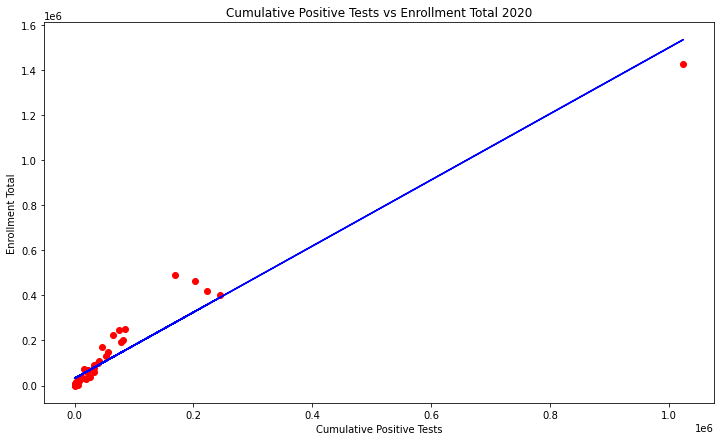

In [53]:
regressor = LinearRegression()
regressor.fit(X_2020, y_2020)

y_pred = regressor.predict(X_2020)
plt.scatter(X_2020, y_2020, color = 'red')
plt.plot(X_2020, regressor.predict(X_2020), color = 'blue')
plt.title('Cumulative Positive Tests vs Enrollment Total 2020')
plt.xlabel('Cumulative Positive Tests')
plt.ylabel('Enrollment Total')
plt.show()

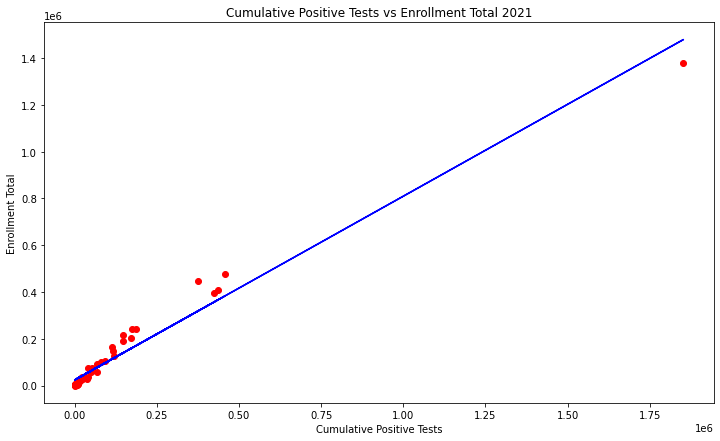

In [54]:
regressor = LinearRegression()
regressor.fit(X_2021, y_2021)

y_pred = regressor.predict(X_2021)
plt.scatter(X_2021, y_2021, color = 'red')
plt.plot(X_2021, regressor.predict(X_2021), color = 'blue')
plt.title('Cumulative Positive Tests vs Enrollment Total 2021')
plt.xlabel('Cumulative Positive Tests')
plt.ylabel('Enrollment Total')
plt.show()

In [55]:
# Reduce the Combined Data Columns to make comparison between ethnic groups vs COVID-19 Cumulative Positive Cases 
# Ethnic groups to be selected will be African American, American Indian, Asian, Filipino, Hispanic, 
# Pacific Islander, and white. 

ethnic_df = combined_data_df[["African American_2020", "African American_2021", "American Indian_2020",
                             "American Indian_2020", "Asian_2020", "Asian_2021", "Filipino_2020",
                              "Filipino_2021", "Hispanic_2020", "Hispanic_2021", "Pacific Islander_2020",
                              "Pacific Islander_2021", "White_2020", "White_2021"
                             ]]
ethnic_df

,African American_2020,African American_2021,American Indian_2020,American Indian_2020,Asian_2020,Asian_2021,Filipino_2020,Filipino_2021,Hispanic_2020,Hispanic_2021,Pacific Islander_2020,Pacific Islander_2021,White_2020,White_2021
CountyName,,,,,,,,,,,,,,
Alameda,20106,18958,577,577,60099,60791,10260,9893,75114,73527,2231,2076,38721,36056
Alpine,0,0,36,36,0,1,0,1,2,3,0,0,26,34
Amador,18,17,89,89,20,16,20,18,868,897,8,6,2633,2553
Butte,587,559,661,661,1757,1726,124,119,7230,7198,98,86,16126,15256
Calaveras,33,30,78,78,30,30,17,15,1052,1027,4,5,3364,3059
Colusa,33,35,55,55,52,51,3,4,3729,3708,9,8,768,724
Contra Costa,14712,13914,514,514,23019,22948,7193,7043,62267,60601,1064,988,49753,46402
Del Norte,25,25,561,561,186,173,22,20,887,879,3,3,2037,1904
El Dorado,312,272,225,225,1108,1155,413,412,6013,5882,78,71,19618,18700
